In [6]:
import os
import sys
import glob
import numpy as np
import pandas as pd

import geopandas as gpd

import cartopy.crs as ccrs
import cartopy.feature as cf
import cartopy.feature as cfeature

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [7]:
dir_base = os.path.join('/','media','arturo','T9','Data','Italy', 'stations', 'Italy_raingauges', 'NQC', 'Marche')

In [8]:
dir_input = os.path.join(dir_base, '1h', 'final', 'METADATA', 'METADATA_MARCHE_3regions.csv')
METADATA = pd.read_csv(dir_input)
METADATA.head(2)

,File,ISO,Region,Code,Name,Elevation,Orig_EPSG,CRS_E,CRS_N,Lat,Lon,Year_Start,Year_End,INTENSE_Resp,AGENCY,Source,TimeZone
0,IT-570_1356_133_Umito_0060.csv,IT-570,Marche,1356,Umito,NaN,32632.0,NaN,NaN,42.74,13.41,2003-06-26,2025-08-29,AS,SIRMIP,Marche,UTC
1,IT-570_1364_134_Capodacqua_0060.csv,IT-570,Marche,2188,Capodacqua,NaN,32632.0,NaN,NaN,42.73,13.24,1951-01-01,2007-10-15,AS,SIRMIP,Marche,UTC


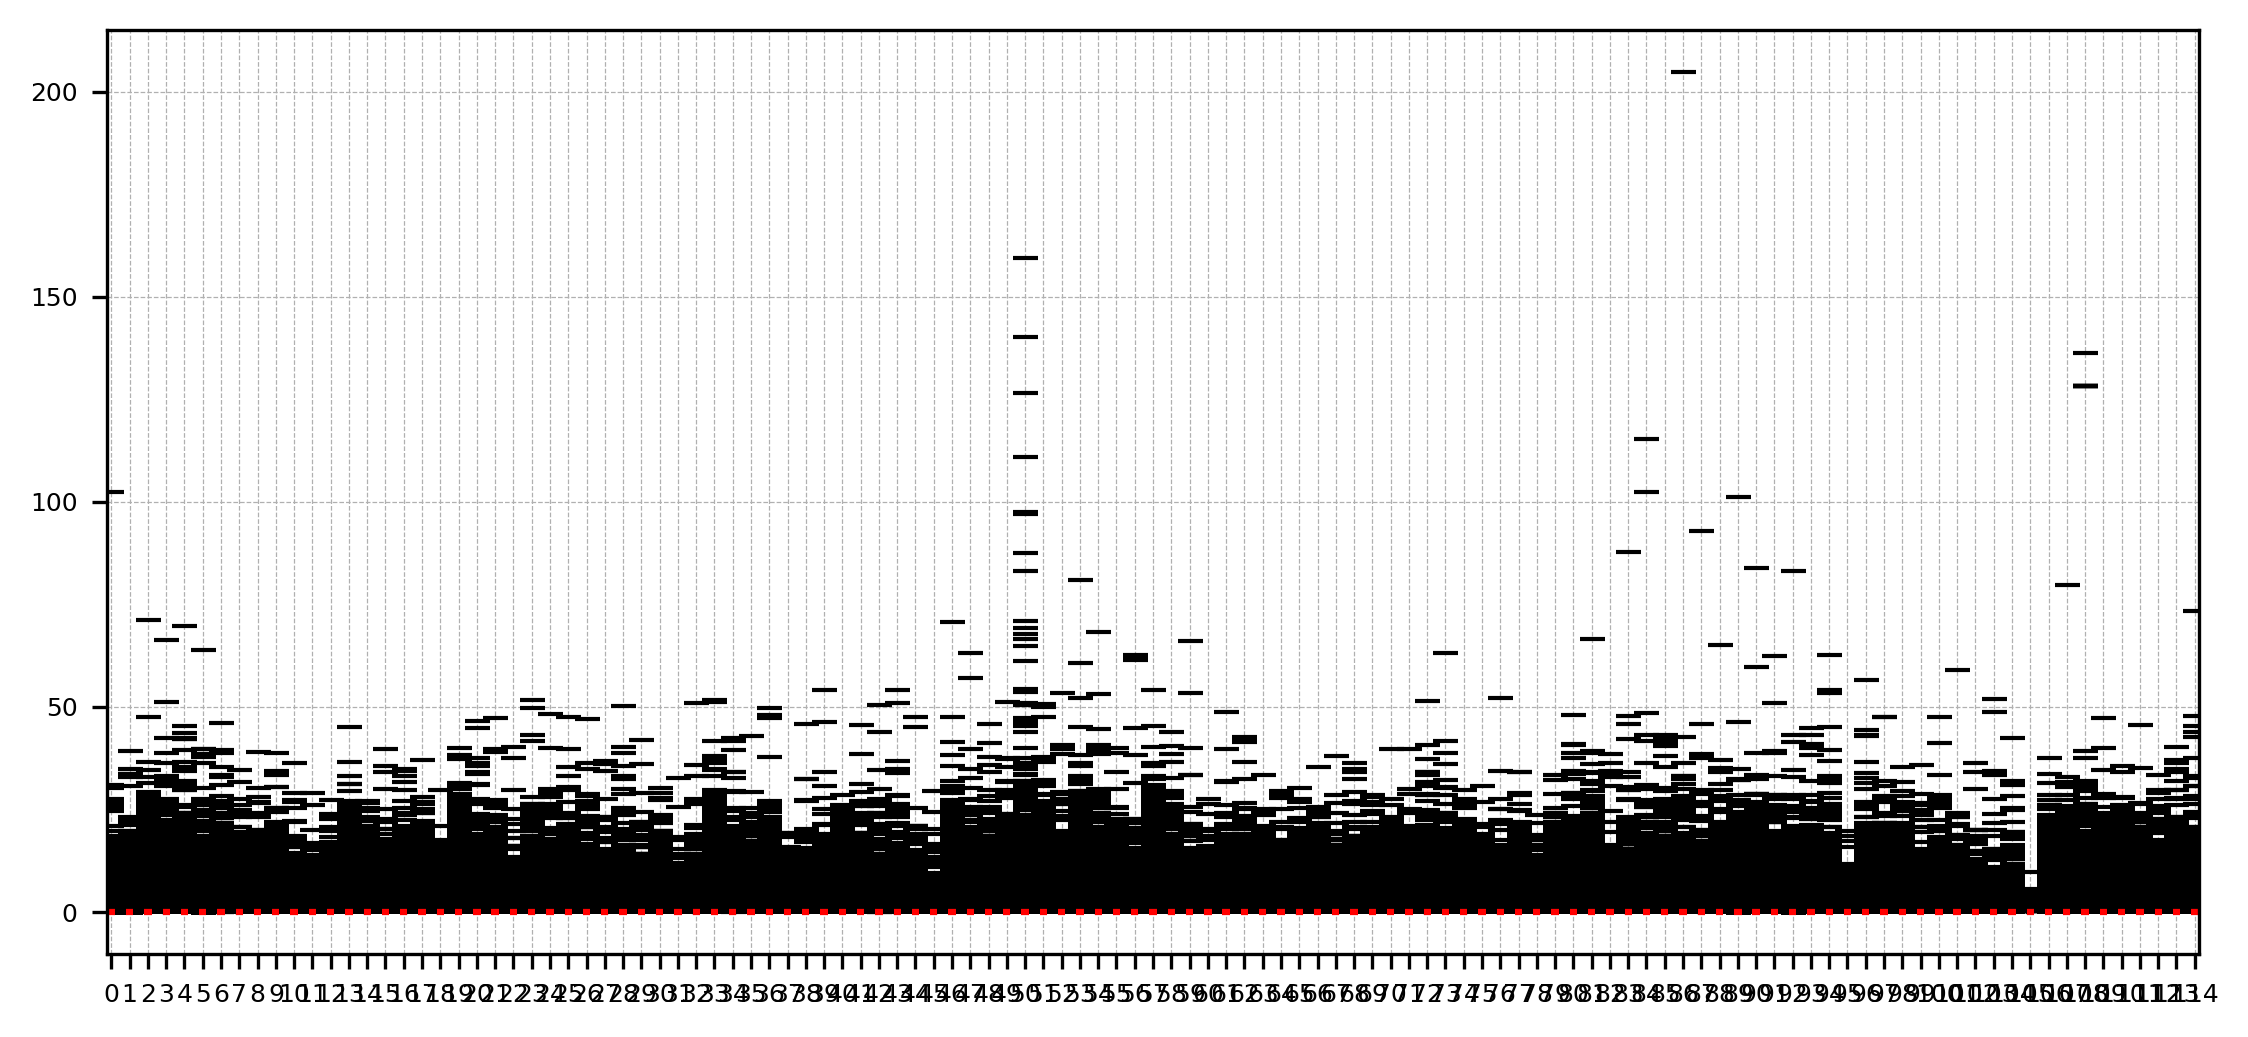

In [9]:
box_width = 0.8
x_pos = np.arange(len(METADATA))

fig = plt.figure(figsize=(9,4),dpi=300)
gs = gridspec.GridSpec(1,1)

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 0])

SAT_boxprops = dict(facecolor='salmon')
DOWN_boxprops = dict(facecolor='royalblue')

meanprops=dict(linestyle='-',color="g",linewidth=1.5)
flierprops = dict(marker='_',markeredgecolor='k',linewidth=1.5)
medianprops = dict(linestyle='-', linewidth=1.5, color='r')

SAT_boxes = []
DOWN_boxes = []
medians = []
fliers = []

for pos in range(len(METADATA)):#len(META_REGION)
    # print(f'Station: {METADATA['File'][pos]}')
    data = pd.read_csv(os.path.join(dir_base,'1h','final','data',METADATA['File'][pos]))
    pre = data['pre'].values
    pre = pre[~np.isnan(pre)]
    pre = pre[pre<300]
    
    SAT_box = ax1.boxplot(pre,positions=[2*pos],
    widths=box_width,boxprops=SAT_boxprops,
    showmeans=False,meanline=True,meanprops=meanprops,
    medianprops=medianprops,
    showfliers=True,flierprops=flierprops,
    patch_artist=True,notch=False)

ax1.set_xticks(2*x_pos)
ax1.set_xticklabels(x_pos)

ax1.grid(linewidth=0.3, linestyle='--')
ax1.tick_params(axis='both', which='major', labelsize=6)

In [10]:
for pos in range(len(METADATA)):#len(METADATA)
    print(f'Station: {METADATA['File'][pos]}')
    data = pd.read_csv(os.path.join(dir_base,'1h','final','data',METADATA['File'][pos]))
    pre = data['pre'].values
    pre = np.where(pre<200,pre,np.nan) # prec limit

    data_update = pd.DataFrame({'Datetime':data.Datetime.values, 'pre':pre})
    data_update['Datetime'] = pd.to_datetime(data_update['Datetime'])
    data_update.set_index('Datetime', inplace=True)

    data_1dy = data_update['pre'].resample('1d').sum()
    pre_1dy = pd.DataFrame({'Datetime':data_1dy.index, 'pre':data_1dy.values})

    dir_out = os.path.join(dir_base,'1dy','data',METADATA['File'][pos])
    pre_1dy.to_csv(dir_out, header=True, index=False)

Station: IT-570_1356_133_Umito_0060.csv
Station: IT-570_1364_134_Capodacqua_0060.csv
Station: IT-570_1541_136_Mozzano_0060.csv
Station: IT-570_1562_139_Rotella_0060.csv
Station: IT-570_1569_140_San Benedetto_0060.csv
Station: IT-570_1586_142_Montemonaco_0060.csv
Station: IT-570_1594_143_Force_0060.csv
Station: IT-570_2004_2230_Montemonaco_0060.csv
Station: IT-570_2011_2240_Diga di Carassai_0060.csv
Station: IT-570_2183_2270_Ripatransone_0060.csv
Station: IT-570_2188_2310_Capodacqua_0060.csv
Station: IT-570_2191_2400_Offida_0060.csv
Station: IT-570_2194_2370_Diga di Talvacchia_0060.csv
Station: IT-570_2198_2390_Ascoli Piceno_0060.csv
Station: IT-570_2202_2320_Arquata del Tronto_0060.csv
Station: IT-570_2203_2330_Acquasanta_0060.csv
Station: IT-570_2207_2340_Croce di Casale_0060.csv
Station: IT-570_2208_2350_Capo di Colle_0060.csv
Station: IT-570_2210_2360_San Martino_0060.csv
Station: IT-570_2650_137_Spinetoli_0060.csv
Station: IT-570_2675_153_Grottammare_0060.csv
Station: IT-570_2733_2

In [11]:
sys.exit()

SystemExit: 

/home/arturo/anaconda3/envs/AXE/lib/python3.13/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


## plot 1dy accumulation

In [ ]:
file_list = glob.glob(os.path.join(dir_base,'1dy','data','*.csv'))
file_list = sorted(file_list)
file_len = len(file_list)
print(f'Number of files: {file_len}')

Number of files: 115


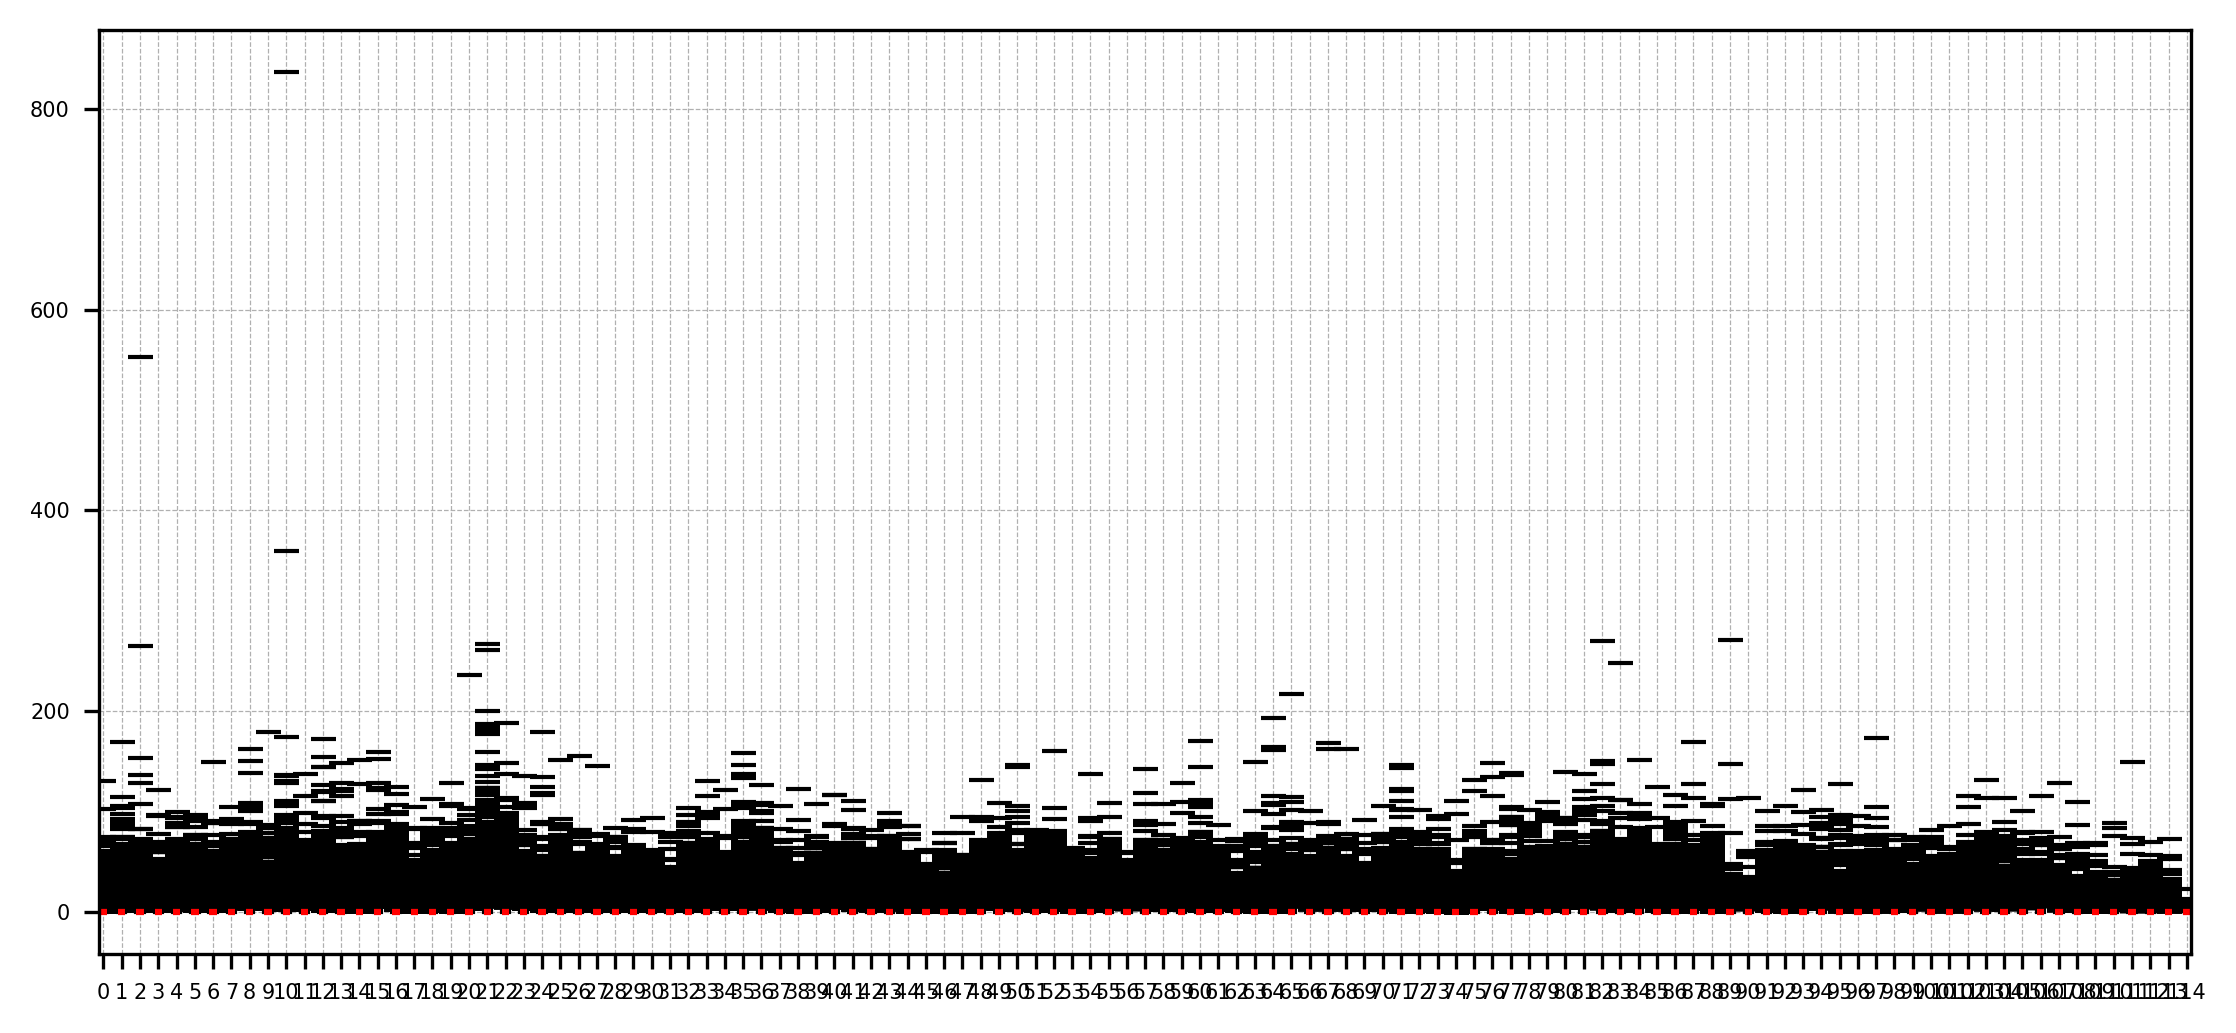

In [ ]:
box_width = 0.8
x_pos = np.arange(file_len)

fig = plt.figure(figsize=(9,4),dpi=300)
gs = gridspec.GridSpec(1,1)

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 0])

SAT_boxprops = dict(facecolor='salmon')
DOWN_boxprops = dict(facecolor='royalblue')

meanprops=dict(linestyle='-',color="g",linewidth=1.5)
flierprops = dict(marker='_',markeredgecolor='k',linewidth=1.5)
medianprops = dict(linestyle='-', linewidth=1.5, color='r')

SAT_boxes = []
DOWN_boxes = []
medians = []
fliers = []

for pos in range(file_len):#len(META_REGION)
    data = pd.read_csv(os.path.join(dir_base,'1h','final','data',file_list[pos]))
    pre = data['pre'].values

    SAT_box = ax1.boxplot(pre,positions=[2*pos],
    widths=box_width,boxprops=SAT_boxprops,
    showmeans=False,meanline=True,meanprops=meanprops,
    medianprops=medianprops,
    showfliers=True,flierprops=flierprops,
    patch_artist=True,notch=False)

ax1.set_xticks(2*x_pos)
ax1.set_xticklabels(x_pos)

ax1.grid(linewidth=0.3, linestyle='--')
ax1.tick_params(axis='both', which='major', labelsize=5)